# Pandas

Pandas basically serves as a data analysis and transformation tool. It provides facilities that allow for easier data representation and, as part of the larger python ecosystem, integrates easily with other Python programs.

Data is essentially kept as an excel sheet
Dictionaries are quite good at modeling pandas structure, as values are grouped
under a certain key.

In [4]:
import pandas as pd
import numpy as np

example_dict = {'name' : ["annie", "bob", "charlie", "damon", "erick","fry", "goldman"],
     'age' : [20,27, 35, 55, 18, 21, 35],
     'designation': ["VP", "CEO", "CFO", "VP", "VP", "CEO", "MD"]
}

Columns in the dataframe may not be in the same order, due to the nature of python dicts

In [5]:
pandas_dataframe =pd.DataFrame(example_dict)

In [6]:
pandas_dataframe

,name,age,designation
0,annie,20,VP
1,bob,27,CEO
2,charlie,35,CFO
3,damon,55,VP
4,erick,18,VP
5,fry,21,CEO
6,goldman,35,MD


The above call lets Pandas create an index from 0 to 6. You can however, pass your own custom index

In [7]:
pd_df_cstm_index = pd.DataFrame(example_dict, index=[1,2,3,4,5,6,7])

In [8]:
pd_df_cstm_index

,name,age,designation
1,annie,20,VP
2,bob,27,CEO
3,charlie,35,CFO
4,damon,55,VP
5,erick,18,VP
6,fry,21,CEO
7,goldman,35,MD


Indexes however need not be numeric. Strings serve this purpose just as well

In [9]:
pd_df_cstm_index = pd.DataFrame(example_dict, index=["First", "Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh"])

In [10]:
pd_df_cstm_index

,name,age,designation
First,annie,20,VP
Second,bob,27,CEO
Third,charlie,35,CFO
Fourth,damon,55,VP
Fifth,erick,18,VP
Sixth,fry,21,CEO
Seventh,goldman,35,MD


Numpy arrays may also be used as indexes

In [11]:
np_arr = np.array([10,20,30,40,50,60,70])

Series objects are restricted to one column, meaning they can serve as references for very frequently
used data rows, such as transaction types, tickers and the like


In [12]:
pd_series = pd.Series(np_arr)
print (pd_series[0])

10


## Reading csv

Pandas can read data from many types of files, but one of the most common is CSV, so we'll be using that.
The example file comes from an art gallery and provides a great variety of data, so that we can demonstrate Pandas
various features.

In [13]:
csv_path = 'https://raw.githubusercontent.com/tategallery/collection/master/artwork_data.csv'
csv_df = pd.read_csv(csv_path,nrows=5)
csv_df

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826.0,1919,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


As we can see, Pandas generated its own id numbers. However, the data collected brings its own ids, so we should take advantage of them.

### index_col

In [14]:
csv_df = pd.read_csv(csv_path,nrows=5, index_col='id')
csv_df

,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
id,,,,,,,,,,,,,,,,,,,
1035,A00001,"Blake, Robert",artist,38,A Figure Bowing before a Seated Old Man with h...,date not known,"Watercolour, ink, chalk and graphite on paper....",Presented by Mrs John Richmond 1922,NaN,1922,support: 394 x 419 mm,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1036,A00002,"Blake, Robert",artist,38,"Two Drawings of Frightened Figures, Probably f...",date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 311 x 213 mm,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
1037,A00003,"Blake, Robert",artist,38,The Preaching of Warning. Verso: An Old Man En...,?c.1785,Graphite on paper. Verso: graphite on paper,Presented by Mrs John Richmond 1922,1785.0,1922,support: 343 x 467 mm,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
1038,A00004,"Blake, Robert",artist,38,Six Drawings of Figures with Outstretched Arms,date not known,Graphite on paper,Presented by Mrs John Richmond 1922,NaN,1922,support: 318 x 394 mm,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
1039,A00005,"Blake, William",artist,39,The Circle of the Lustful: Francesca da Rimini...,"1826–7, reprinted 1892",Line engraving on paper,Purchased with the assistance of a special gra...,1826.0,1919,image: 243 x 335 mm,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...


As we can see, by adding that last parameter, we managed to change the id column used by Pandas. This column could be any other and doesn't need to be an id. All Pandas needs is a column name and it will do the rest.

### usecols

This parameters allows you to select which columns should actually be recovered from the file. You can refer to them by name or by index but you cannot mix them, meaning, a single call may contain only numbers or only names.

In [15]:
csv_df = pd.read_csv(csv_path,nrows=5, index_col='id',usecols=['id','artist'])
csv_df

,artist
id,
1035,"Blake, Robert"
1036,"Blake, Robert"
1037,"Blake, Robert"
1038,"Blake, Robert"
1039,"Blake, William"


To keep the code clean, let's define an array of columns that we'll need going forward.
We'll also drop the nrows parameter so that we can read all the rows at once.

In [16]:
cols = ['id','artist','title','medium','year','acquisitionYear','height','width','units']
csv_df = pd.read_csv(csv_path, index_col='id',usecols=cols)
csv_df

C:\Users\waee\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343,467,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243,335,mm
1040,"Blake, William",Ciampolo the Barrator Tormented by the Devils,Line engraving on paper,1826,1919.0,240,338,mm
1041,"Blake, William",The Baffled Devils Fighting,Line engraving on paper,1826,1919.0,242,334,mm
1042,"Blake, William",The Six-Footed Serpent Attacking Agnolo Brunel...,Line engraving on paper,1826,1919.0,246,340,mm
1043,"Blake, William",The Serpent Attacking Buoso Donati,Line engraving on paper,1826,1919.0,241,335,mm


In [17]:
csv_df.to_pickle('C:\\Users\\waee\\Downloads\\test.bin')

Here we simply save the data obtained using Pickle, a serialization tool.
Pandas has it already included, so no explicit import is actually needed.

## Json Processing

Pandas has real way of processing Json directly, so it must be transformed into a format that Pandas can use first.
Thankfully, such a task is relatively easy to accomplish in Python.

In [18]:
#First we define an array with the names of the columns we want to retrieve from the Json files
cols_retrieve = ['id','all_artists','title','medium','acquisitionYear','height','width']

In [19]:
import os
import json
def retrieveDataFromFile(path, cols):
    with open(path) as artFile:
        data = json.load(artFile)
    record = []
    for field in cols:
        try:
            record.append(data[field])
        except:
            record.append(np.nan)
    return tuple(record)

This function, as the name implies, retrieves data from the specified file. 

In [20]:
jsonTest = "C:\\Users\\waee\\Downloads\\collection-master\\collection-master\\artworks\\a\\000\\a00001-1035.json"

In [21]:
retrieveDataFromFile(jsonTest,cols_retrieve)

(1035,
 'Robert Blake',
 'A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch',
 'Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper',
 1922,
 '419',
 '394')

In [22]:
artwork_root ='C:\\Users\waee\\Downloads\\collection-master\\collection-master\\artworks' 

Now, we'll walk through the file structure to retrieve all of the json files. WARNING: This might take a long time.
If you don't want to wait, place a break after the if so that only the first file of each directory will be examined.

In [23]:
import sys
artworks = []
for root,dirs,files in os.walk(artwork_root):
    for f in files:
        if f.endswith('json'):
            try:
                record = retrieveDataFromFile(os.path.join(root,f), cols_retrieve)
                artworks.append(record)
            except:
                pass #some files don't have an acquisition date, so this is needed in order to prevent the program from crashing
                
        break; #uncomment this to only load first file
df = pd.DataFrame.from_records(artworks,columns=cols_retrieve, index='id')
df


,all_artists,title,medium,acquisitionYear,height,width
id,,,,,,
1035,Robert Blake,A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",1922,419,394
20230,"Sir Edward Coley Burne-Jones, Bt",Study of Heads for a Pietà,Graphite and chalk on paper,1927,154,136
6725,Arthur Boyd Houghton,[title not known],Graphite on paper,1922,,
7330,George Jones,[title not known],Ink on paper,1888,,
7430,George Jones,[title not known],Ink on paper,1888,,
7530,George Jones,[title not known],Ink on paper,1888,,
7630,George Jones,[title not known],Watercolour on paper,1888,,
7730,George Jones,[title not known],Ink and graphite on paper,1888,,
9492,"Sir John Everett Millais, Bt",The Sower,Wood engraving on paper,1924,108,140


In [24]:
artworks_by_Francis = df['all_artists'] == 'Francis Bacon' #Simple query to get all art pieces made by the given artist
artworks_by_Francis #This Pandas method counts all truthy values, so 1s, true and any value considered truthy will be counted

id
1035      False
20230     False
6725      False
7330      False
7430      False
7530      False
7630      False
7730      False
9492      False
14407     False
14700     False
12191     False
69330     False
69430     False
69530     False
69630     False
69730     False
69830     False
98171     False
98537     False
97256     False
97551     False
99037     False
98345     False
99125     False
99132     False
105706    False
105826    False
105944    False
106055    False
          ...  
24928     False
25315     False
25456     False
25801     False
25254     False
25746     False
25392     False
25713     False
25933     False
80033     False
80857     False
84316     False
88228     False
88060     False
81819     False
26747     False
94662     False
66602     False
99423     False
100499    False
101563    False
96968     False
108923    False
90120     False
111919    False
118532    False
117815    False
117484    False
89762     False
123531    False
Name: all_artists, Le

In [25]:
artworks_by_Francis = df['all_artists'].value_counts()
print('Jiro Takamatsu',artworks_by_Francis['Jiro Takamatsu'])

Jiro Takamatsu 1


## loc

This method allows you filter data using row and column indexers. The row indexers are the id values previously set, and the column indexers are the column names.

In [26]:
df.loc[1035,:]#Specific id. Colon in the column index is used to retrieve all columns.

all_artists                                             Robert Blake
title              A Figure Bowing before a Seated Old Man with h...
medium             Watercolour, ink, chalk and graphite on paper....
acquisitionYear                                                 1922
height                                                           419
width                                                            394
Name: 1035, dtype: object

In [27]:
df.loc[df['all_artists']=='Jiro Takamatsu',:]

,all_artists,title,medium,acquisitionYear,height,width
id,,,,,,
117815,Jiro Takamatsu,Shadow,Graphite on paper,2012,181,260


Queries may also be placed in the row field, yielding results similar to those of a SQL SELECT.

## iloc

iloc functions in a similar way to loc, but only allows the use of numbers as parameters.

In [28]:
df.iloc[100:300,2] #The first parameter in this case uses the given range.

id
34390                                    Graphite on paper
34490                                    Graphite on paper
34590                                                 None
34689                                                 None
34789                                 Pen and ink on paper
34889                                                 None
34989                                    Graphite on paper
35089                                    Graphite on paper
35189                                                 None
35289                                    Graphite on paper
35389                                    Graphite on paper
35489                    Graphite and watercolour on paper
35589                                    Graphite on paper
35689                                    Graphite on paper
35787                                 Pen and ink on paper
35887                                    Graphite on paper
35987                                 Pen and ink on 

## max and idxmax

max returns the maximum value of the given column, idxmax returns the identifier that belongs to such a record.
Care should be practiced however, as data may not be entirely clean and could cause errors, such as with the following query.

In [29]:
df['width'].idxmax()

TypeError: reduction operation 'argmax' not allowed for this dtype

This happens due to the fact that there's strings mixed up with numbers.
A relatively simple way to fix this is using the coerce method.
Here, you attempt to perform a transformation and, if an error happens, a neutral value of the target type will be inserted, as a substitute of the previous value.


In [30]:
pd.to_numeric(df['width'], errors='coerce')

id
1035       394.0
20230      136.0
6725         NaN
7330         NaN
7430         NaN
7530         NaN
7630         NaN
7730         NaN
9492       140.0
14407        NaN
14700      178.0
12191      111.0
69330        NaN
69430        NaN
69530        NaN
69630        NaN
69730        NaN
69830        NaN
98171      309.0
98537      391.0
97256      371.0
97551      695.0
99037      820.0
98345        NaN
99125     2330.0
99132      647.0
105706     609.0
105826     273.0
105944     679.0
106055     808.0
           ...  
24928      210.0
25315      160.0
25456      131.0
25801      170.0
25254       35.0
25746      183.0
25392      113.0
25713      106.0
25933      250.0
80033      478.0
80857      643.0
84316        NaN
88228       90.0
88060     2120.0
81819      966.0
26747       80.0
94662        NaN
66602        NaN
99423        NaN
100499    5200.0
101563       NaN
96968      260.0
108923     404.0
90120     1510.0
111919       NaN
118532     750.0
117815     260.0
117484    2

This corrects the values, but does not actually assign them.
For that, we'll need to bring back the loc method.

In [31]:
test = df.loc[:,'width'] = pd.to_numeric(df['width'],errors='coerse')
test=test.fillna("potato")
test

id
1035         394
20230        136
6725      potato
7330      potato
7430      potato
7530      potato
7630      potato
7730      potato
9492         140
14407     potato
14700        178
12191        111
69330     potato
69430     potato
69530     potato
69630     potato
69730     potato
69830     potato
98171        309
98537        391
97256        371
97551        695
99037        820
98345     potato
99125       2330
99132        647
105706       609
105826       273
105944       679
106055       808
           ...  
24928        210
25315        160
25456        131
25801        170
25254         35
25746        183
25392        113
25713        106
25933        250
80033        478
80857        643
84316     potato
88228         90
88060       2120
81819        966
26747         80
94662     potato
66602     potato
99423     potato
100499      5200
101563    potato
96968        260
108923       404
90120       1510
111919    potato
118532       750
117815       260
117484     

As you can see, the values are now assigned and it's safe to use max and idxmax.

In [32]:
df['width'].max()

5200.0

In [33]:
df['width'].idxmax()

100499

In [67]:
group = df.groupby('all_artists')

In [58]:
def changeNaN(series):
    return series.fillna(0)

### Transform

This operation applies the given function to the provided data series.
First parameter is the function while the second parameter indicates whether the function is applied per row or column.

In [73]:
group.transform(changeNaN)

,title,medium,acquisitionYear,height,width
id,,,,,
1035,A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",1922,419,394.0
20230,Study of Heads for a Pietà,Graphite and chalk on paper,1927,154,136.0
6725,[title not known],Graphite on paper,1922,,0.0
7330,[title not known],Ink on paper,1888,,0.0
7430,[title not known],Ink on paper,1888,,0.0
7530,[title not known],Ink on paper,1888,,0.0
7630,[title not known],Watercolour on paper,1888,,0.0
7730,[title not known],Ink and graphite on paper,1888,,0.0
9492,The Sower,Wood engraving on paper,1924,108,140.0


When grouping, data is separated into two large groups: the grouped column first, and the rest of the selected data second.
The names used for each group are irrelevant, you can choose whichever, but as usual it's best to choose meaningful names.

In [74]:
for artist, remainder in group:
    print(artist)
    print(remainder['acquisitionYear'])

Abraham Cooper
id
25254    1997
Name: acquisitionYear, dtype: int64
Achilles Droungas
id
4007    1975
Name: acquisitionYear, dtype: int64
Adrian Stokes
id
6    2001
Name: acquisitionYear, dtype: int64
Akram Zaatari
id
101045    2008
101145    2008
Name: acquisitionYear, dtype: int64
Alan Davie
id
20183    1991
Name: acquisitionYear, dtype: int64
Albert Goodwin
id
5506    1901
Name: acquisitionYear, dtype: int64
Albert Houthuesen
id
6865    1975
Name: acquisitionYear, dtype: int64
Alex Katz
id
98171    2008
Name: acquisitionYear, dtype: int64
Alexander Cozens
id
22546    1996
22508    1996
Name: acquisitionYear, dtype: int64
Allen David
id
3632    1975
Name: acquisitionYear, dtype: int64
Ambrose McEvoy
id
9081    1926
Name: acquisitionYear, dtype: int64
Andrew Wilson
id
23997    1997
Name: acquisitionYear, dtype: int64
Andy Warhol
id
97551    2009
99037    2009
66602    2008
Name: acquisitionYear, dtype: int64
Anthony Gross
id
5698    1946
Name: acquisitionYear, dtype: int64
Art & Langu

Name: acquisitionYear, dtype: int64
Wyndham Lewis
id
8701    1956
Name: acquisitionYear, dtype: int64
Yves Tanguy
id
26747    2007
Name: acquisitionYear, dtype: int64
after Edward Dayes
id
19578    1988
Name: acquisitionYear, dtype: int64
after John Flaxman
id
25456    1997
25801    1997
Name: acquisitionYear, dtype: int64
after Joseph Mallord William Turner
id
15069    1986
15169    1986
15269    1986
15369    1986
15469    1986
16664    1988
16764    1988
17177    1988
18848    1989
19632    1988
19728    1988
19828    1988
19928    1988
20028    1988
Name: acquisitionYear, dtype: int64
after Peter De Wint
id
17077    1988
Name: acquisitionYear, dtype: int64
attributed to Benjamin Ralph
id
23406    1997
Name: acquisitionYear, dtype: int64


## Aggregate

This method receives a parameter that indicates how the series should be aggregated. The operation is performed for every column except the one that was used as the grouping column.

In [79]:
group.agg(np.min)

,title,acquisitionYear,height,width
all_artists,,,,
Abraham Cooper,[title not known],1997,76,35.0
Achilles Droungas,"A Fig, a Plumb, a Quince, an Apple, a Pear",1975,698,524.0
Adrian Stokes,"Landscape, Blasted Tree",2001,510,685.0
Akram Zaatari,"A girl and her brother. Studio Shehrazade, Sai...",2008,289,290.0
Alan Davie,"Two Insects, Yellow",1991,176,308.0
Albert Goodwin,Ali Baba and the Forty Thieves,1901,1420,1075.0
Albert Houthuesen,5. Muse and Clown,1975,632,491.0
Alex Katz,Pansies,2008,404,309.0
Alexander Cozens,Landscape with Castle,1996,142,98.0


## Filtering

Series or dataframes can be filtered using the .filter method. It receives a condition as a parameter, which is a function that allows the column or row to be filtered.

In [91]:
df.filter(like='ear',axis=1)#Axis of 1 goes over columns, 0 over rows

,acquisitionYear
id,
1035,1922
20230,1927
6725,1922
7330,1888
7430,1888
7530,1888
7630,1888
7730,1888
9492,1924


## Exporting to Excel

Pandas allows for easy exporting of a dataframe to Excel files.


In [96]:
df.to_excel('test.xlsx')#All columns dumped
df.to_excel('test2.xlsx',index=False)#No index column included
df.to_excel('test3.xlsx',columns=['all_artists','title','acquisitionYear'])#Only selected columns, index still included
df.to_excel('test4.xlsx',columns=['all_artists','title','acquisitionYear'],index=False)#Only selected columns and index is not included

Panda also allows you to create different sheets before writing the file.
You can select which DataFrames will go into which sheets. Each sheet can have its columns selected independently from each other.

In [104]:
excel_writer=pd.ExcelWriter('sheets_example.xlsx', engine='xlsxwriter') #This entity handles sheets storage and writing
df.to_excel(excel_writer,sheet_name='First',index=False)
df.to_excel(excel_writer, sheet_name='Second',columns=['all_artists','title','acquisitionYear'],index=False)
excel_writer.save()

Before the save command, no sheets have actually been written, they've only been saved to the writer.

Many more operations may be performed, but they belong to the underlying ExcelWriter class which is not part of Pandas, so they won't be covered.

## SQL connectivity

Pandas also allows for connectivity with classic SQL databases. In the name of speed, we'll use SQLite.

In [107]:
import sqlite3

with sqlite3.connect('example_db.db')as conn:
    df.to_sql('Test',conn)

### Exporting to JSON

In [108]:
df.to_json('test.json')

## Plotting

In [113]:
group = df.groupby('acquisitionYear').size()

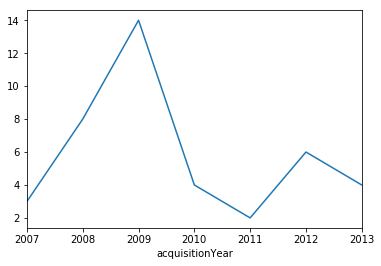

In [118]:
group.plot()

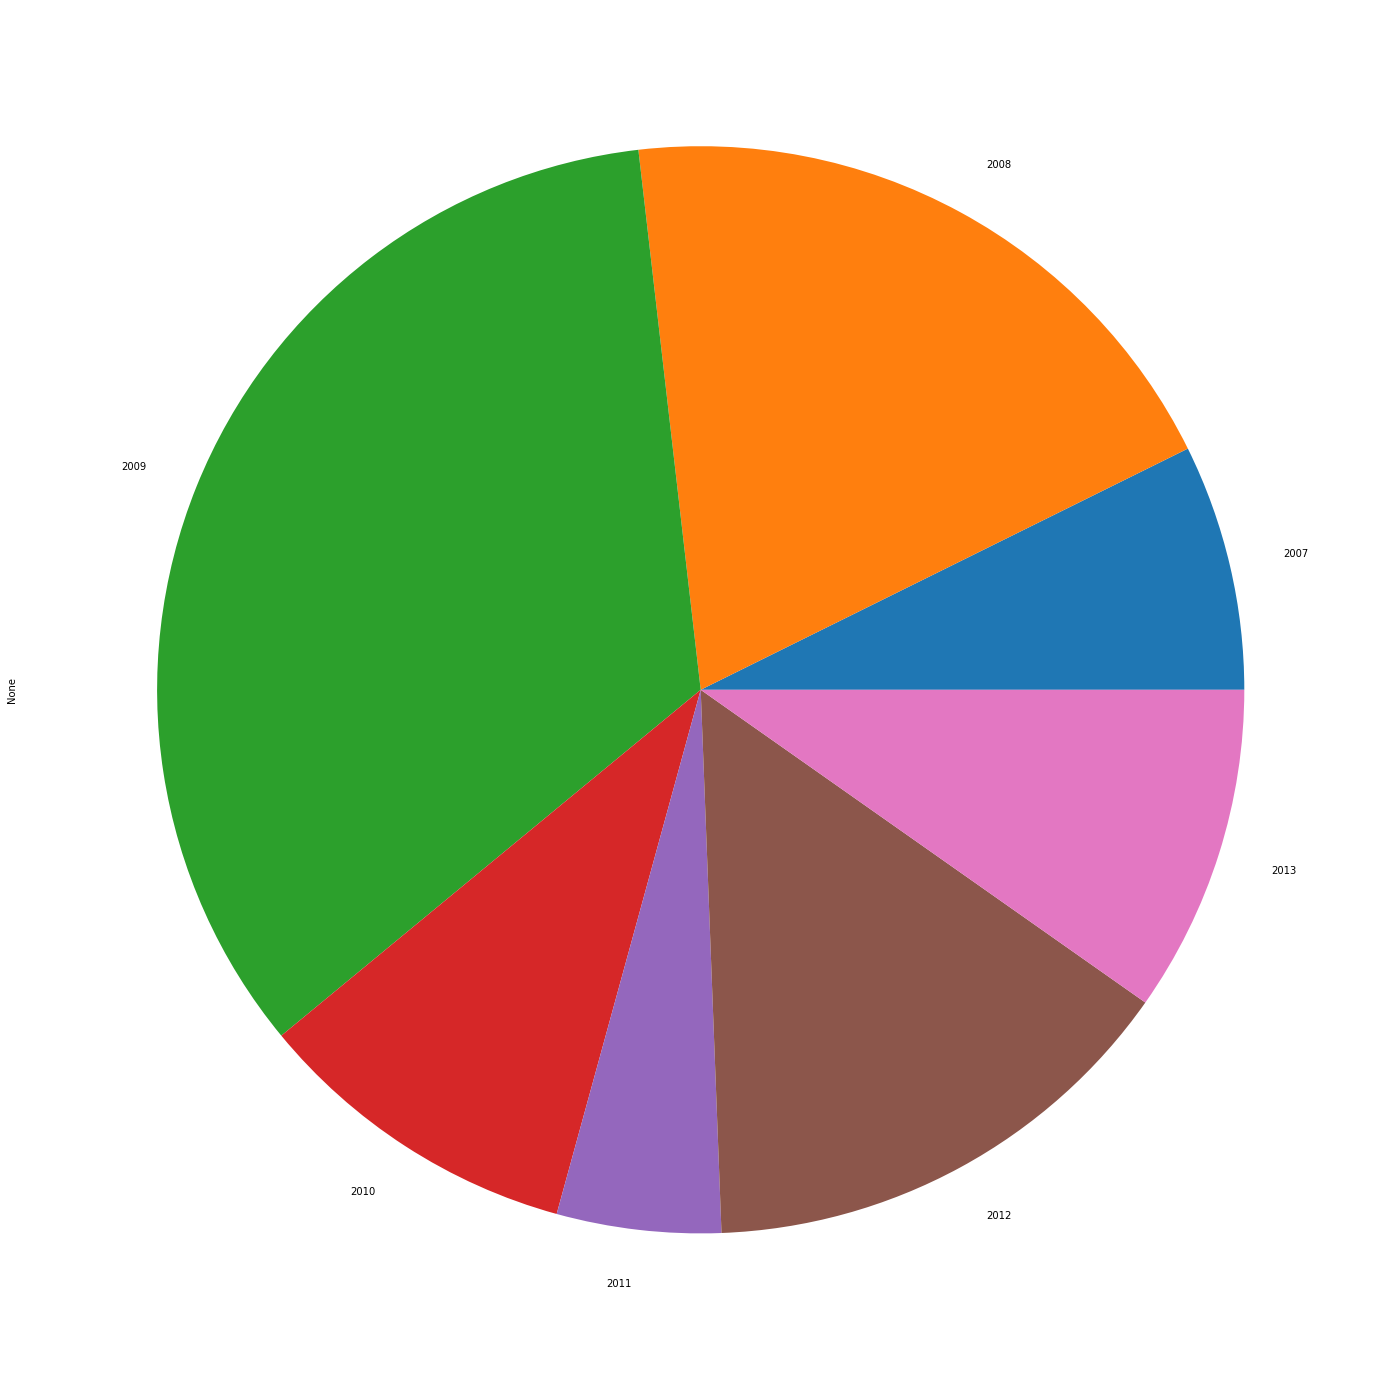

In [120]:
group[100:200].plot.pie(figsize=(25, 25))#Slice of data reduced to increase visibility

Pandas offers a huge amount of visualization options, all of which are thoroughly demonstrated here: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html